#### Exercitiul 1. Incercati experimentul aruncarii unei monede. 
1. Ar fi interesant de facut un experiment cu 5, 10, 30 de observatii. Notati rezultatele.
2. Testati rezultatele cu hypothesis testing folosind ca ipoteza nula p=0.5.
3. Ce putem spune despre felul in care evolueaza intervalul de incredere?

In [7]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

Populating the interactive namespace from numpy and matplotlib


In [82]:
# 1

#np.random.seed(3)

draws = 5
coin_sample = random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  1 0.2
Tails:  4 0.8


In [83]:
draws = 10
coin_sample = random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  6 0.6
Tails:  4 0.4


In [93]:
draws = 30
coin_sample = random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', draws-heads, 1-heads/draws)

Heads:  14 0.4666666666666667
Tails:  16 0.5333333333333333


2.Testati rezultatele cu hypothesis testing folosind ca ipoteza nula p=0.5.

In [86]:
# pentru 5 aruncari

stats.binom_test(x=[1, 4], p=0.5, alternative='two-sided')

0.375

In [87]:
# pentru 10 aruncari

stats.binom_test(x=[6, 4], p=0.5, alternative='two-sided')

0.7539062500000002

In [88]:
# pentru 30 de aruncari

stats.binom_test(x=[17, 13], p=0.5, alternative='two-sided')

0.5846647117286928

3.Ce putem spune despre felul in care evolueaza intervalul de incredere?

#####  RASPUNS:  Executand testele de mai multe ori (simuland si aruncarile), am observat ca pentru valori >= 30 valoarea lui pValue este mai rezonabila, valoarea sa fiind >0.5, neavand motive sa respingem ipoteza ca moneda este "adevarata", adicafiecare fata poate cadea cu o probabilitate de 0.5 . Putem supune ca odata cu marirea numarului de observatiiintervalul de incredere este mai mare.

#### Exercitiul 2

Verificati daca exista vre-o corelatie intre inaltimea fetelor sau baietilor in raport cu mamele lor. 
1. Masurati coeficientul de corelatie dintre aceste variabile 
2. Comentati aceste rezultate in comparatie cu cele obtinute pentru parintii de sex masculin si copii lor

In [8]:
 pearson = pd.read_csv('http://www-eio.upc.edu/~pau/cms/rdata/csv/HistData/PearsonLee.csv', index_col=False)
#pearson = pd.read_csv('pearson.csv')

In [110]:
pearson.head(-400)

,Unnamed: 0,child,parent,frequency,gp,par,chl
0,1,59.5,62.5,0.50,fs,Father,Son
1,2,59.5,63.5,0.50,fs,Father,Son
2,3,59.5,64.5,1.00,fs,Father,Son
3,4,60.5,62.5,0.50,fs,Father,Son
4,5,60.5,66.5,1.00,fs,Father,Son
...,...,...,...,...,...,...,...
341,342,69.5,64.5,5.25,md,Mother,Daughter
342,343,69.5,65.5,3.25,md,Mother,Daughter
343,344,69.5,66.5,3.25,md,Mother,Daughter
344,345,69.5,67.5,0.75,md,Mother,Daughter


In [9]:
fs = pearson[pearson['gp']=='fs']
fd = pearson[pearson['gp']=='fd']

In [10]:
ms = pearson[pearson['gp']=='ms']
md = pearson[pearson['gp']=='md']

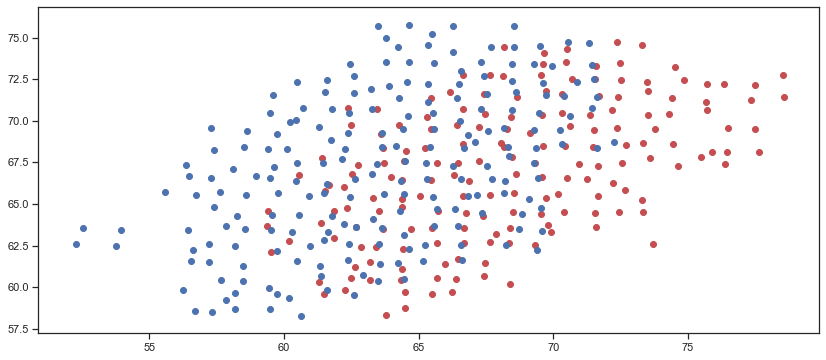

In [11]:
# facem un scatterdot pentru a vedea corelatia dintre inaltimile fiicelor si a fiilor cu inaltimea tatalui
plt.scatter(
    fs['child'] + np.random.normal(scale=0.2, size=fs.shape[0]), 
    fs['parent'] + np.random.normal(scale=0.2, size=fs.shape[0]), c='r')
plt.scatter(
    fd['child'] + np.random.normal(scale=0.2, size=fd.shape[0]), 
    fd['parent'] + np.random.normal(scale=0.2, size=fd.shape[0]), c='b')
plt.show()

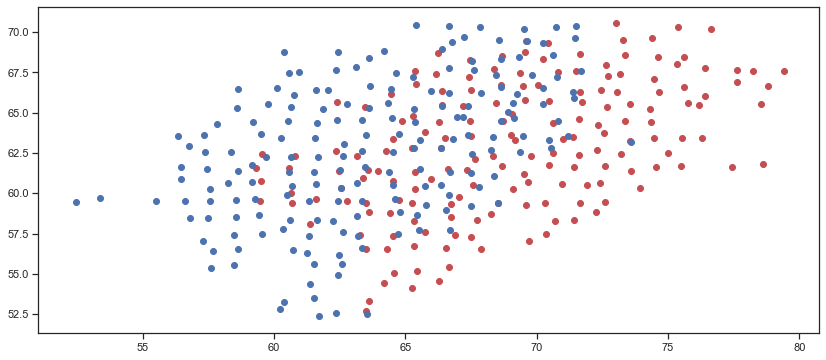

In [12]:
# facem un scatterdot pentru a vedea corelatia dintre inaltimile fiicelor si a fiilor cu inaltimea mamei
plt.scatter(
    ms['child'] + np.random.normal(scale=0.2, size=ms.shape[0]), 
    ms['parent'] + np.random.normal(scale=0.2, size=ms.shape[0]), c='r')
plt.scatter(
    md['child'] + np.random.normal(scale=0.2, size=md.shape[0]), 
    md['parent'] + np.random.normal(scale=0.2, size=md.shape[0]), c='b')
plt.show()

#### 1.Masurati coeficientul de corelatie dintre aceste variabile 

In [13]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-white')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


##### a) metoda 1 => (r,p-val)

In [27]:
#pentrul coeficientul de corelatie dintre inaltimea mamei si inaltimea fiului
stats.pearsonr(ms['parent'], ms['child'])

(0.48491768425178605, 9.100362271637274e-12)

In [28]:
#pentrul coeficientul de corelatie dintre inaltimea mamei si inaltimea fetei
stats.pearsonr(md['parent'], md['child'])

(0.4674367713012403, 1.9747722235598635e-11)

##### b) metoda 2 => Calcularea coeficientului de corelatie cu riscul alfa=0.05 folosind pingouin

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)

In [39]:
import pingouin as pg
pg.corr(x=ms['parent'], y=ms['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,176,0.485,"[0.36, 0.59]",0.235,0.226,9.100362e-12,9.761e+08,1.0


In [40]:
pg.corr(x=md['parent'], y=md['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,185,0.467,"[0.35, 0.57]",0.218,0.21,1.974772e-11,4.529e+08,1.0


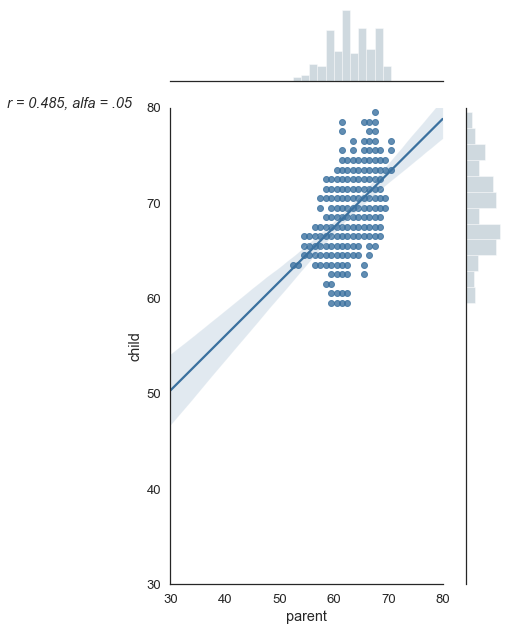

In [37]:
#coeficientul de corelatie calculat pentru inaltimea mamei si inaltimea baiatului
g = sns.JointGrid(data=ms, x='parent', y='child', xlim=(30, 80), ylim=(30, 80), height=9)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0, 80, 'r = 0.485, alfa = .05', fontstyle='italic')
plt.tight_layout()

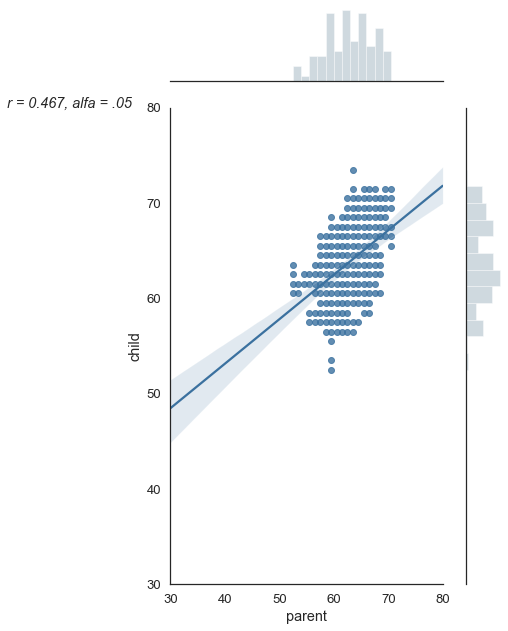

In [38]:
#coeficientul de corelatie calculat pentru inaltimea mamei si inaltimea fetei
g = sns.JointGrid(data=md, x='parent', y='child', xlim=(30, 80), ylim=(30, 80), height=9)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0, 80, 'r = 0.467, alfa = .05', fontstyle='italic')
plt.tight_layout()

##### 2.Comentati aceste rezultate in comparatie cu cele obtinute pentru parintii de sex masculin si copii lor

In [45]:
# avem rezultatele:
#tata - fiica
pg.corr(x=fd['parent'], y=fd['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,206,0.472,"[0.36, 0.57]",0.223,0.215,7.905672e-13,1.002e+10,1.0


In [46]:
#tata - fiu
pg.corr(x=fs['parent'], y=fs['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,179,0.521,"[0.4, 0.62]",0.271,0.263,7.954370e-14,9.784e+10,1.0


In [47]:
#mama -  fiica
pg.corr(x=md['parent'], y=md['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,185,0.467,"[0.35, 0.57]",0.218,0.21,1.974772e-11,4.529e+08,1.0


In [48]:
#mama - fiu
pg.corr(x=ms['parent'], y=ms['child'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,176,0.485,"[0.36, 0.59]",0.235,0.226,9.100362e-12,9.761e+08,1.0


##### RASPUNS: Din cele 4 date, observam ca legatura dintre variabile este pozitiva (r>0) , moderata (0.4 < r <0.7) , iar r^2% ne arata cat la suta din variatia variabilelor dependente (inaltimile copiilor) este explicata de variatia variabilei independente (inaltimea parintilor). Observam ca cel mai mare rezultat l-am obtinut la modelul tata-fiu, unde 27.1% din variatia inaltimii baiatului este explicata de variatia inaltimi tatalui.